In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
sys.path.append(os.path.abspath('../src'))
from portfolio_utils import load_asset_data, compute_daily_returns

# Load processed CSVs
tsla, spy, bnd = load_asset_data(
    "../data/processed/TSLA_clean.csv",
    "../data/processed/SPY_clean.csv",
    "../data/processed/BND_clean.csv"
)

# Compute daily returns
tsla_returns = compute_daily_returns(tsla)
spy_returns = compute_daily_returns(spy)
bnd_returns = compute_daily_returns(bnd)

# Combine into one DataFrame
returns_df = pd.concat([tsla_returns, spy_returns, bnd_returns], axis=1)
returns_df.columns = ["TSLA", "SPY", "BND"]

returns_df.head()


,TSLA,SPY,BND
Date,,,
2015-07-02,0.040386,-0.000916,0.002472
2015-07-06,-0.001071,-0.002846,0.003452
2015-07-07,-0.042328,0.006289,0.000983
2015-07-08,-0.048231,-0.016777,0.002825
2015-07-09,0.011610,0.001809,-0.003306


In [2]:
import pandas as pd

# Load your LSTM forecast
lstm_df = pd.read_csv("../results/forecasts/tsla_lstm_future_forecast.csv", parse_dates=["Date"])
lstm_df.set_index("Date", inplace=True)

# Calculate daily % returns from forecasted prices
lstm_df['Forecast_Return'] = lstm_df['Forecast'].pct_change()
daily_returns = lstm_df['Forecast_Return'].dropna()

# Convert daily return to annual return
tsla_expected_annual = daily_returns.mean() * 252

print(f"📈 TSLA expected annual return from LSTM forecast: {tsla_expected_annual:.2%}")


📈 TSLA expected annual return from LSTM forecast: -25.03%


In [3]:
from portfolio_utils import calculate_expected_returns

# Manually input LSTM-based TSLA expected annual return
tsla_expected_annual = -0.2503 # Replace with your actual calculated value

# Calculate expected returns for all assets
expected_returns = calculate_expected_returns(
    tsla_expected_annual,
    returns_df["SPY"],
    returns_df["BND"]
)

expected_returns


{'TSLA': -0.2503,
 'SPY': np.float64(0.14484444876286645),
 'BND': np.float64(0.019599375059884364)}

In [4]:
from portfolio_utils import compute_covariance_matrix

# Compute daily return covariance matrix
cov_matrix = compute_covariance_matrix(returns_df)

cov_matrix


,TSLA,SPY,BND
TSLA,0.001390,0.000210,0.000007
SPY,0.000210,0.000132,0.000005
BND,0.000007,0.000005,0.000012


In [5]:
from portfolio_utils import simulate_random_portfolios

# Run simulation
portfolios_df, asset_labels = simulate_random_portfolios(expected_returns, cov_matrix)

portfolios_df.head()


,Returns,Volatility,Sharpe,Weights
0,0.071797,0.009695,6.374073,"[0.09784296501149996, 0.6276139633959614, 0.27..."
1,-0.160216,0.028014,-6.076148,"[0.729092004503085, 0.13546540941426943, 0.135..."
2,0.098440,0.008310,10.642602,"[0.0200119501874526, 0.6726183177105184, 0.307..."
3,-0.049731,0.010149,-5.885238,"[0.25890493093112465, 0.004373639091215078, 0...."
4,-0.183592,0.030569,-6.332922,"[0.8026024923499441, 0.10723696528112109, 0.09..."


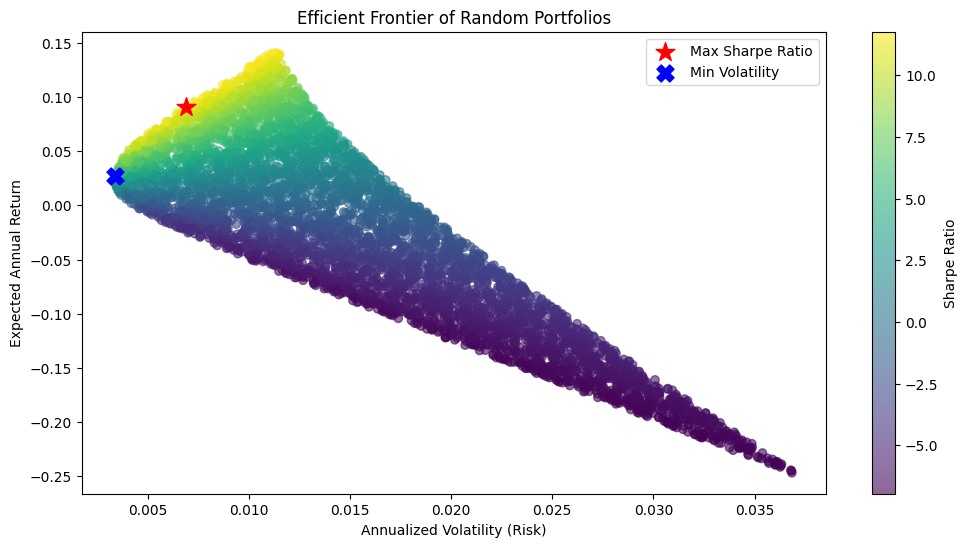

In [8]:
from portfolio_utils import plot_efficient_frontier

# Plot and save the efficient frontier
max_idx, min_idx = plot_efficient_frontier(
    portfolios_df,
    asset_labels
)
